In [1]:
#classical methods for age prediction- Keras+ Scikit Learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("../Python/Dataset/Age")
data.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<function seaborn.utils.despine>

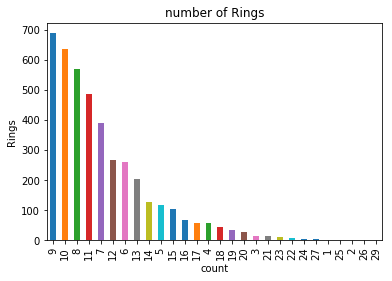

In [3]:
data['Rings'].value_counts().plot(kind='bar')
plt.title('number of Rings')
plt.xlabel('count')
plt.ylabel('Rings')
sns.despine

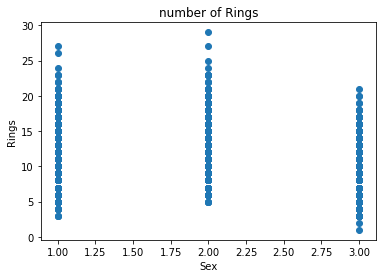

In [4]:
plt.scatter(data.Sex,data.Rings)
plt.title('number of Rings')
plt.xlabel('Sex')
plt.ylabel('Rings')

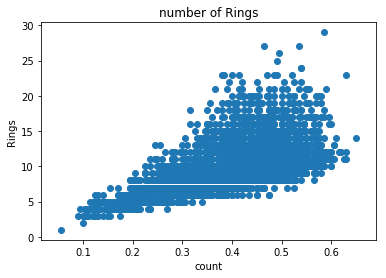

In [5]:
plt.scatter(data.Diameter,data.Rings)
plt.title('number of Rings')
plt.xlabel('count')
plt.ylabel('Rings')

In [6]:
#Linear regression
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()

In [8]:
labels = data['Rings']
train1 = data.drop(['Rings'],axis=1)

In [9]:
from sklearn.cross_validation import train_test_split

/home/jobin/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.20, random_state =2 )
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
reg.score(x_test,y_test)

0.5216700960988542

In [12]:
# gradient boost regression
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth =6, min_samples_split = 4, 
                                         learning_rate = 0.01, loss= 'ls')

In [13]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [14]:
clf.score(x_test,y_test)

0.5698089003362754

In [15]:
#neural network for time series prediction Keras+ Theano
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

/home/jobin/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
np.random.seed(7)
df = pd.read_csv("../Python/Dataset/passengers.csv", sep=';', parse_dates=True, index_col=0)
data = df.values
data = data.astype('float32')
train = data[0:120,:]
test = data[120:,:]

In [17]:
def prepare_data(data, lags=1):
    X, y = [],[]
    for row in range (len(data)-lags-1):
        a = data[row:(row+lags),0]
        X.append(a)
        y.append(data[row+lags,0])
    return np.array(X), np.array(y)
lags=1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test

<function matplotlib.pyplot.show>

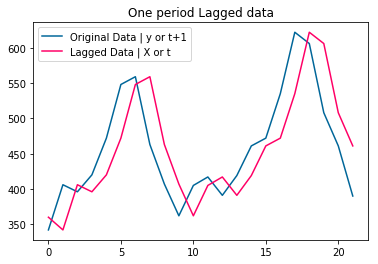

In [18]:
plt.plot(y_test,label='Original Data | y or t+1', color = '#006699')
plt.plot(X_test,label='Lagged Data | X or t', color = '#ff0066')
plt.legend(loc='upper left')
plt.title('One period Lagged data')
plt.show

In [19]:
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer ='adam')
mdl.fit(X_train, y_train, epochs = 200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 44665.6885
Epoch 2/200
 - 0s - loss: 36787.0864
Epoch 3/200
 - 0s - loss: 28625.0052
Epoch 4/200
 - 0s - loss: 20593.7936
Epoch 5/200
 - 0s - loss: 13540.4101
Epoch 6/200
 - 0s - loss: 8116.9804
Epoch 7/200
 - 0s - loss: 4484.1327
Epoch 8/200
 - 0s - loss: 2442.4896
Epoch 9/200
 - 0s - loss: 1428.9916
Epoch 10/200
 - 0s - loss: 1028.6580
Epoch 11/200
 - 0s - loss: 888.7442
Epoch 12/200
 - 0s - loss: 841.8815
Epoch 13/200
 - 0s - loss: 831.8561
Epoch 14/200
 - 0s - loss: 831.6369
Epoch 15/200
 - 0s - loss: 827.2567
Epoch 16/200
 - 0s - loss: 830.2156
Epoch 17/200
 - 0s - loss: 831.4749
Epoch 18/200
 - 0s - loss: 826.8436
Epoch 19/200
 - 0s - loss: 827.5675
Epoch 20/200
 - 0s - loss: 829.3061
Epoch 21/200
 - 0s - loss: 833.9242
Epoch 22/200
 - 0s - loss: 828.6805
Epoch 23/200
 - 0s - loss: 828.0706
Epoch 24/200
 - 0s - loss: 825.1940
Epoch 25/200
 - 0s - loss: 826.7681
Epoch 26/200
 - 0s - loss: 833.4315
Epoch 27/200
 - 0s - loss: 825.8851
Epoch 28/200
 - 0s - l

In [21]:
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 816.70 MSE (28.58 RMSE)
Test Score: 2800.48 MSE (52.92 RMSE)


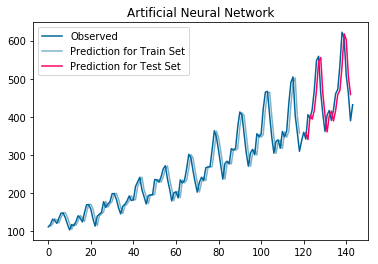

In [22]:
train_predict=mdl.predict(X_train)
test_predict=mdl.predict(X_test)
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict
 
# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict
 
# plot baseline and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Artificial Neural Network')
plt.show()

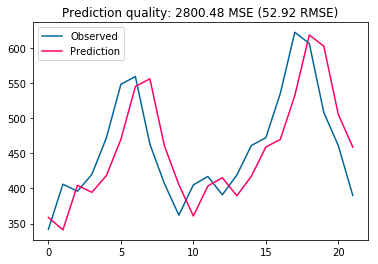

In [23]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='best');
plt.show()

In [24]:
#neural network for time series prediction Keras+ Tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

Instructions for updating:
Use the retry module or similar alternatives.


In [25]:
#read data
data = pd.read_csv("../Python/Dataset/eeg")
data.head()

,EEG
0,12
1,22
2,35
3,45
4,69


4096


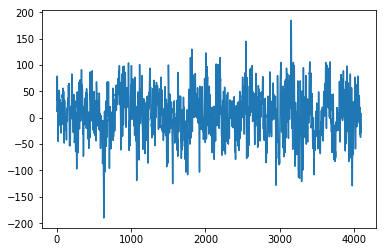

In [26]:
#parse & plot data
ts = data['EEG']
ts = ts[0:(len(ts)-1)]
print len(ts)
plt.plot(ts)

In [27]:
#prepare train data into batches
TS = np.array(ts[0:(len(ts))])
num_periods = 20
f_horizon = 1
x_data = TS[:(len(TS)-(len(TS)%num_periods))] #selected the first window of entire data fit in batches of num_periods
x_batches = x_data.reshape(-1, 20, 1)

y_data = TS[1:(len(TS)-(len(TS)%num_periods))+f_horizon] # left the frist sample and selected the next window of data
y_batches = y_data.reshape(-1, 20, 1)
print(len(x_batches))
print(x_batches.shape)
#print(x_batches[0:2])

print(len(y_batches))
print(y_batches.shape)
#print(y_batches[0:2])

204
(204, 20, 1)
204
(204, 20, 1)


In [28]:
x_data

array([ 12,  22,  35, ..., -23, -31, -23])

In [29]:
y_data

array([ 22,  35,  45, ..., -31, -23,  -1])

In [30]:
# prepare test data
def test_data (series, forecasts, num_periods):
    test_x_setup=TS[-(num_periods+forecasts):] # selected the last batch
    test_X=test_x_setup[:(num_periods)].reshape(-1,20,1) # selected the first 20(num_period) of last batch(size 21)
    test_Y=TS[-(num_periods):].reshape(-1,20,1) # selcted the last 20 of last of last batch(size 21)
    return test_X, test_Y
X_test, Y_test = test_data(TS,f_horizon,num_periods)
print(X_test.shape)
print(Y_test.shape)

(1, 20, 1)
(1, 20, 1)


In [31]:
# Create tensorflow graph
tf. reset_default_graph()
num_periods = 20
inputs =1
hidden = 300
output = 1

X = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = hidden, activation = tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype = tf.float32)

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs-y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init= tf.global_variables_initializer()

In [32]:
#train the model
inputs =[]
epochs = 3000
with tf.Session() as sess:
    init.run()
    for ep in range (epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep%10 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            inputs.append(mse)
            print ep,"\tMSE:", mse
            
    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred)
        
    

0 	MSE: 7006844.0
10 	MSE: 1772210.5
20 	MSE: 1168005.0
30 	MSE: 922498.6
40 	MSE: 794828.5
50 	MSE: 680976.25
60 	MSE: 690193.3
70 	MSE: 599189.1
80 	MSE: 680876.7
90 	MSE: 526264.0
100 	MSE: 432661.88
110 	MSE: 382873.12
120 	MSE: 351179.0
130 	MSE: 354276.62
140 	MSE: 312692.44
150 	MSE: 295025.72
160 	MSE: 282220.3
170 	MSE: 272412.8
180 	MSE: 264788.62


KeyboardInterrupt: 

In [ ]:
plt.title("Forecast vs Title", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), label = "Actual")
plt.plot(pd.Series(np.ravel(y_pred)), label = "Forecast")
plt.legend(loc = "upper right")
plt.xlabel("Samples")
plt.show()

In [ ]:
plt.title("MSE", fontsize=14)
plt.plot(pd.Series(np.ravel(inputs)))
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

0.49437934925715543


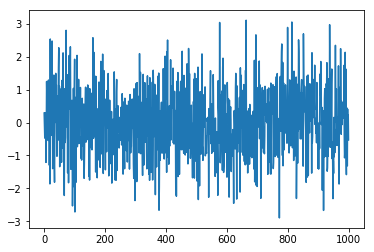

In [9]:
import nolds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#lm = ts.reshape(4096,1)
rwalk = np.random.normal(0,1,1000)
plt.plot(rwalk)
x = np.fromiter(rwalk, dtype="float32")
l = nolds.hurst_rs(x)
print l